In [1]:
import numpy as np
import matplotlib.pyplot as plt

# dtw 함수를 정의. 이 함수는 두 개의 입력 시퀀스 Q와 C를 받음.
def dtw(Q, C):
    n = len(Q)
    m = len(C)
# (n+1) x (m+1) 크기의 0으로 채워진 배열 DTW를 생성
# 이 배열은 비용 행렬로 사용, 각 셀은 해당 위치까지 도달하는데 필요한 최소 비용을 나타냄
    DTW = np.zeros((n+1, m+1))
    
# 첫 번째 열과 첫 번째 행을 무한대로 설정 -> 실제 계산이 시작되기 전에 가상의 "경곗값"을 만들어냄
# DTW 계산 중에 발생할 수 있는 범위 초과 오류를 방지, 경로가 항상 (0, 0)에서 시작하도록 보장
    for i in range(1, n+1):
        DTW[i][0] = float('inf')
        
    for i in range(1, m+1):
        DTW[0][i] = float('inf')
# 경로가 (0, 0)에서 시작하고, 그 다음 위치를 결정할 때 이전 위치의 비용을 기반으로 계산하기 위해 DTW[0][0] = 0 으로 초기화
    DTW[0][0] = 0

# Dynamic Time Warping(DTW) 알고리즘의 핵심 부분
# 각 셀에 대해 최소 누적 비용을 계산하고 저장
# 현재 위치(i, j)에서 비용을 계산. 
    for i in range(1, n+1):
        for j in range(1, m+1):  # 2중 for문 사용 : 두 시퀀스 Q와 C 각각에 대해 순차적으로 반복하면서, DTW 행렬의 모든 셀을 방문하고 해당 위치에서의 누적 비용을 계산하고 저장하기 위함
            cost = (Q[i-1]-C[j-1])**2  #이 비용은 Q[i-1]와 C[j-1] 사이의 차이(여기서는 제곱 차이)에 기반  -> 루트 연산은 계산 복잡성을 증가시키므로, 실제 구현에서는 종종 생략되기도 하며, 제곱 차이만으로 충분히 두 시점 간 거리 개념을 표현 가능. 결론적으로 DTW 알고리즘이 동작하는 원리나 성능에 크게 영향을 주지 않음
            DTW[i][j] = cost + min(DTW[i-1][j],DTW[i][j-1],DTW[i-1][j-1])  # 이전 단계까지 도달하는데 필요한 최소 비용을 결정하기 위해, 현재 위치(i, j)에 도달할 수 있는 세 가지 가능한 위치 (왼쪽: (i-1, j), 위쪽: (i, j-1), 왼쪽 위쪽: (i-1, j-1))를 확인하고 그 중에서 가장 작은 값을 선택, 선택된 최소 값과 현재 위치에서 계산된 비용을 합산하여 현재 위치(i,j)에 대한 누적 비용을 업데이트
# 위 과정을 통해 각 셀에 대한 최소 누적 비용이 DTW 배열에 저장


# Dynamic Time Warping(DTW) 알고리즘의 마지막 단계, 이 과정을 통해 두 시퀀스 간의 최적 경로를 찾음.
    path_x,path_y=[],[] # path_x, path_y : 빈 리스트로 초기화. 이 리스트들은 최적 경로를 따라갈 때 각 시퀀스에서의 인덱스를 저장하는 데 사용
    
    i=n; j=m # 시작점 - DTW 행렬의 마지막 셀인 (n, m)으로 설정. n, m : 각각 첫 번째 시퀀스와 두 번째 시퀀스의 길이
    
    # while 문을 통해 DTW 행렬을 거꾸로 탐색. 현재 위치 (i, j)를 path_x, path_y에 추가하고 이전 위치로 이동하는 과정을 반복.
    while(i>0 and j>0): 
        path_x.append(i)
        path_y.append(j)
        # 현재 위치에서 가능한 세 가지 이전 위치 (왼쪽: (i-1, j), 위쪽: (i, j-1), 왼쪽 위쪽: (i-1, j-1)) 중에서 가장 작은 비용을 가진 위치를 선택
        # np.argmin 함수를 통해 주어진 배열 내에서 최소값의 인덱스를 반환
        min_index=np.argmin([DTW[i - 1,j],DTW[i,j - 1],DTW[i - 1,j - 1]])

        # 선택된 최소 비용 위치에 따라 다음 위치로 이동
        # 만약 왼쪽(i-1, j)이 선택되었다면 i만 감소(j는 그대로 유지)
        #위쪽(i, j-1)이 선택되었다면 j만 감소(i는 그대로 유지).
        # 왼쪽 위(i-1, j-1)가 선택되었다면 i와 j 모두 감소
        # 이 과정을 반복하면서 처음까지 돌아가게 되며, 결과적으로 path_x와 path_y에 저장된 인덱스들이 바로 최적 경로를 나타내게 됨.
        if min_index==0:
            i=i-1  
        elif min_index==1:
            j=j-1
        else:
            i=i-1
            j=j-1

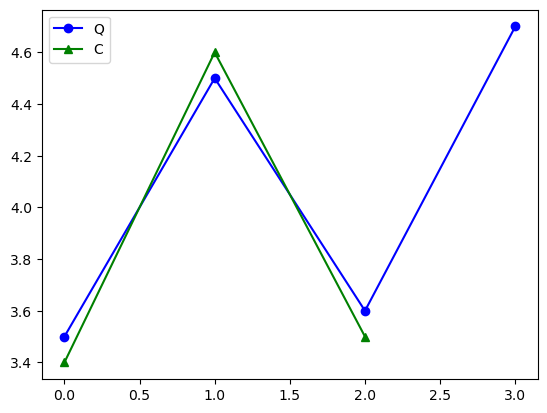

In [4]:
# Example usage:
Q=[3.5 ,4.5 ,3.6 ,4.7]
C=[3.4 ,4.6 ,3.5]

dtw(Q,C)

plt.plot(Q,'bo-' ,label='Q')
plt.plot(C,'g^-', label='C')
plt.legend();